Première analyse des données "objets trouvés" de la SNCF

# Importation des données

In [2]:
data <- read.csv2("/Users/thomasvannier/Stage/SNCF/Datasets/database.csv", sep = ";", header = TRUE, encoding = "utf-8")


In [3]:
dim(data)

[1] 356141     15

In [4]:
names(data)

[1] "FREQUENTATION_ANNUELLE" "NATURE_OBJETS"          "DATE"                  
 [4] "HEURE"                  "DECALAGE_HORAIRE"       "TYPE_OBJETS"           
 [7] "COMMUNE"                "DEPARTEMENT"            "REGION"                
[10] "LONGITUDE"              "LATITUDE"               "WGS_84"                
[13] "GARE"                   "CODE_UIC"               "CODE_POSTAL"

Chaque objet trouvé de notre base est décrit avec 15 attributs.

# Analyse factorielle des correspondances (AFC)

On fait une AFC entre les régions françaises et les différents types d'objets perdus.

In [5]:
typeobjet <- data$TYPE_OBJETS
region <- data$REGION

In [6]:
new_data <- data.frame(region,typeobjet)

In [7]:
profil_colonne <- data.frame(typeobjet,region)

Une fois notre nouveau dataframe créé, on va faire le tableau de contingence.

In [8]:
ctable <- table(new_data)

In [60]:
head(ctable)

,"Appareils électroniques, informatiques, appareils photo","Articles d'enfants, de puériculture","Articles de sport, loisirs, camping",Articles médicaux,"Bagagerie: sacs, valises, cartables","Bijoux, montres","Clés, porte-clés, badge magnétique",Divers,Instruments de musique,"Livres, articles de papéterie",Optique,Parapluies,Pièces d'identités et papiers personnels,"Porte-monnaie / portefeuille, argent, titres","Vélos, trotinettes, accessoires 2 roues","Vêtements, chaussures"
Alsace,4632,270,314,146,7758,293,1361,778,70,1016,1334,433,2397,3175,404,3659
Aquitaine,2673,190,203,120,5610,160,545,285,47,461,787,119,2332,2095,163,1813
Auvergne,468,26,58,14,699,31,121,66,2,81,182,66,194,364,10,410
Basse-Normandie,1254,115,116,40,1588,77,230,190,32,282,488,120,498,625,40,996
Bourgogne,1100,84,30,25,1226,52,119,84,20,37,174,34,113,454,33,239
Bretagne,3219,350,362,114,4769,163,483,528,50,802,1282,535,428,1484,156,4660


On a donc la répartition des différents types d'objets perdus pour chaque région. On passe ce tableau en profil ligne, c'est à dire que l'on représente ce tableau en pourcentage avec la somme de chaque pourcentage des lignes faisant 100%

In [11]:
profil_ligne_region <- prop.table(ctable, 1)

In [12]:
head(profil_ligne_region)

,"Appareils électroniques, informatiques, appareils photo","Articles d'enfants, de puériculture","Articles de sport, loisirs, camping",Articles médicaux,"Bagagerie: sacs, valises, cartables","Bijoux, montres","Clés, porte-clés, badge magnétique",Divers,Instruments de musique,"Livres, articles de papéterie",Optique,Parapluies,Pièces d'identités et papiers personnels,"Porte-monnaie / portefeuille, argent, titres","Vélos, trotinettes, accessoires 2 roues","Vêtements, chaussures"
Alsace,0.165192582025678,0.00962910128388017,0.0111982881597718,0.00520684736091298,0.276676176890157,0.0104493580599144,0.0485378031383738,0.0277460770328103,0.00249643366619116,0.0362339514978602,0.0475748930099857,0.0154422253922967,0.0854850213980028,0.113231098430813,0.0144079885877318,0.130492154065621
Aquitaine,0.151849116627848,0.0107936147247628,0.0115321252059308,0.00681701982616599,0.31869567687326,0.00908935976822133,0.0309606317105039,0.0161904220871442,0.00266999943191501,0.0261887178321877,0.0447082883599386,0.00676021132761461,0.132477418621826,0.119013804465148,0.00925978526387548,0.102993807873658
Auvergne,0.167621776504298,0.00931232091690544,0.0207736389684814,0.00501432664756447,0.250358166189112,0.0111031518624642,0.0433381088825215,0.0236389684813754,0.000716332378223496,0.0290114613180516,0.0651862464183381,0.0236389684813754,0.0694842406876791,0.130372492836676,0.00358166189111748,0.146848137535817
Basse-Normandie,0.187415931848752,0.0171872664773576,0.0173367209684651,0.00597817964429831,0.237333731878643,0.0115079958152742,0.0343745329547153,0.028396353310417,0.00478254371543865,0.0421461664923031,0.0729337916604394,0.0179345389328949,0.074428336571514,0.0934090569421611,0.00597817964429831,0.148856673143028
Bourgogne,0.28765690376569,0.0219665271966527,0.00784518828451883,0.00653765690376569,0.320606694560669,0.0135983263598326,0.0311192468619247,0.0219665271966527,0.00523012552301255,0.00967573221757322,0.0455020920502092,0.00889121338912134,0.0295502092050209,0.118723849372385,0.00862970711297071,0.0625
Bretagne,0.166056229043075,0.0180551973175135,0.018674232654114,0.00588083569770441,0.246014960020634,0.00840856332215631,0.0249161722981687,0.0272375548104204,0.00257931390250193,0.041372194996131,0.0661336084601496,0.0275986587567707,0.0220789270054166,0.0765540366262574,0.00804745937580604,0.24039205571318


Une fois les données préparées, on peut appliquer une AFC

In [61]:
library(FactoMineR)

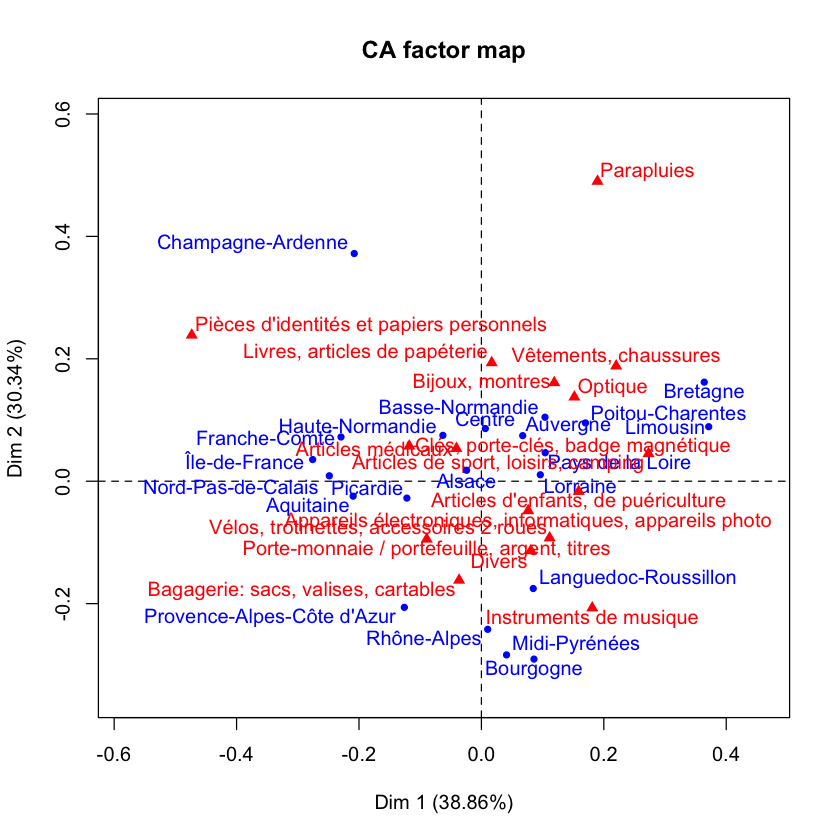

In [62]:
profil_ligne <- CA(profil_ligne_region)

On peut déjà remarquer deux groupes de régions. On voit que les régions du Sud (respectivement du Nord) de la France on tendance à se regrouper ensemble. La région Champagne-Ardenne, quand a elle, est complétement seule. 

# ACH

Calcul des distances

In [56]:
ctable.cr <- scale(ctable,center=T,scale=T)

In [57]:
d.région <- dist(ctable.cr)

CAH - Critère de Ward

In [58]:
cah.ward <- hclust(d.région,method="ward.D2")

                    Alsace                  Aquitaine 
                         1                          1 
                  Bretagne                     Centre 
                         1                          1 
        Nord-Pas-de-Calais           Pays de la Loire 
                         1                          1 
Provence-Alpes-Côte d'Azur                Rhône-Alpes 
                         1                          1 
                  Auvergne            Basse-Normandie 
                         2                          2 
                 Bourgogne          Champagne-Ardenne 
                         2                          2 
             Franche-Comté            Haute-Normandie 
                         2                          2 
      Languedoc-Roussillon                   Limousin 
                         2                          2 
                  Lorraine              Midi-Pyrénées 
                         2                          2 
          

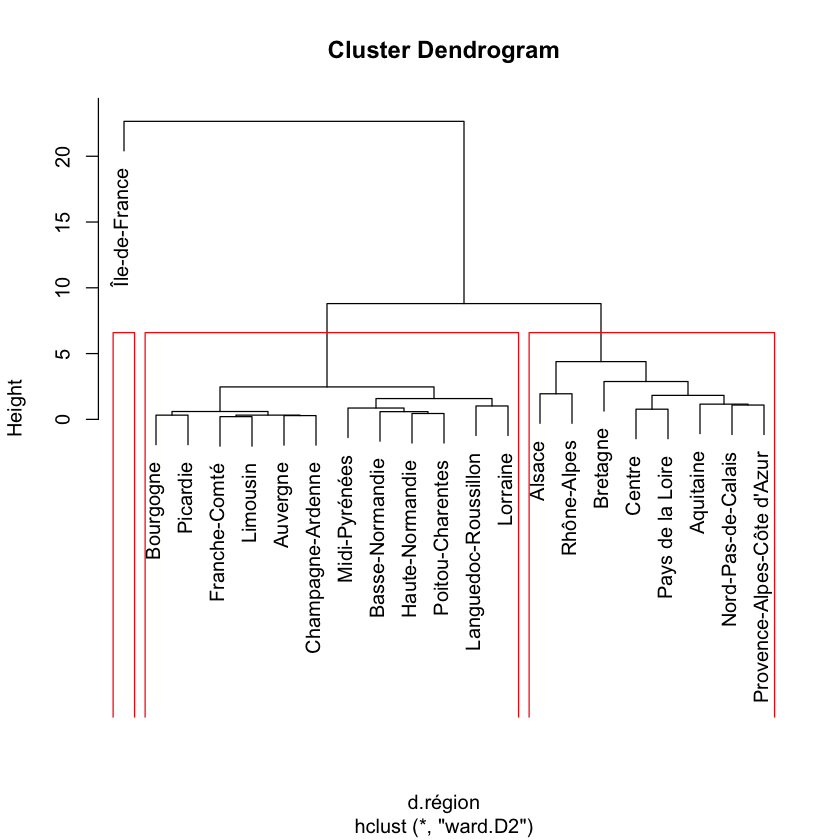

In [59]:
plot(cah.ward)
#dendrogramme avec matérialisation des groupes
rect.hclust(cah.ward,k=3)
#découpage en 4 groupes
groupes.cah <- cutree(cah.ward,k=3)
#liste des groupes
print(sort(groupes.cah))

# KMEANS

In [30]:
#k-means avec les données centrées et réduites
#center = 4 - nombre de groupes demandés
#nstart = 5 - nombre d'essais avec différents individus de départ
#parce que les résultats sont dépendants de l’initialisation
groupes.kmeans <- kmeans(ctable.cr,3)

In [31]:
print (groupes.kmeans)

K-means clustering with 3 clusters of sizes 1, 12, 8

Cluster means:
  Appareils électroniques, informatiques, appareils photo
1                                               3.9593048
2                                              -0.4864054
3                                               0.2346950
  Articles d'enfants, de puériculture Articles de sport, loisirs, camping
1                           3.9564389                           3.2537104
2                          -0.4881338                          -0.5749402
3                           0.2376459                           0.4556965
  Articles médicaux Bagagerie: sacs, valises, cartables Bijoux, montres
1        4.18772870                           3.9918559      4.17371725
2       -0.40619141                          -0.4674672     -0.40649088
3        0.08582103                           0.2022188      0.08802167
  Clés, porte-clés, badge magnétique     Divers Instruments de musique
1                         4.16932521  4.0671

## Comparaison avec l'ACH

In [45]:
print (table(groupes.cah,groupes.kmeans$cluster))

           
groupes.cah  1  2  3
          1  0  1  8
          2  0 11  0
          3  1  0  0


## Recherche du nombre optimum de cluster

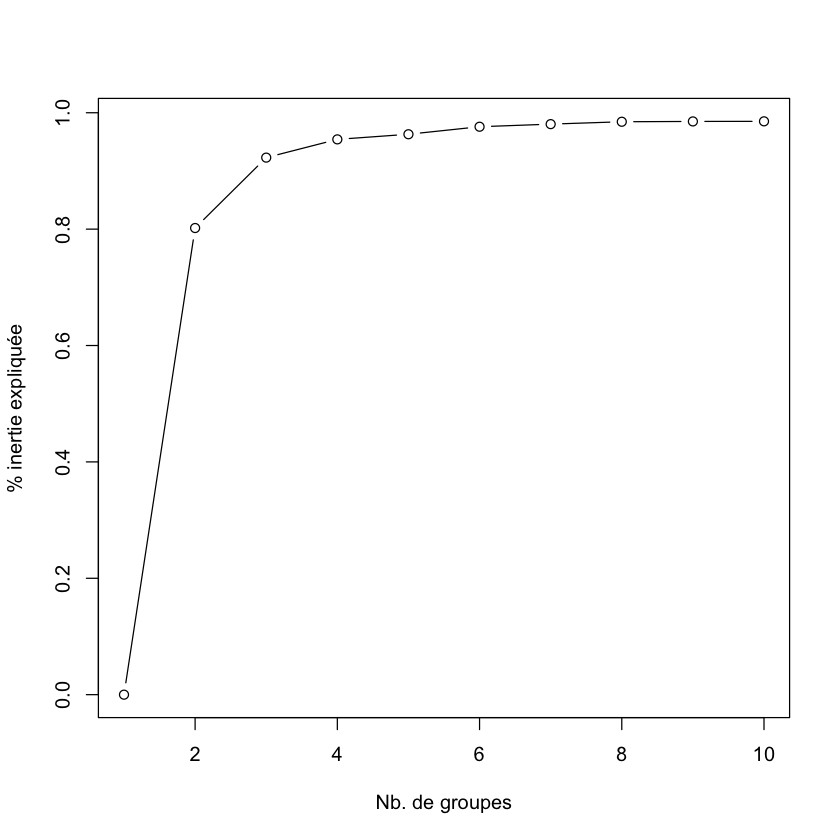

In [47]:
#(1)évaluer la proportion d'inertie expliquée
inertie.expl <- rep(0,times=10)
for (k in 2:10){
 clus <- kmeans(ctable.cr,k)
 inertie.expl[k] <- clus$betweenss/clus$totss
}
#graphique
plot(1:10,inertie.expl,type="b",xlab="Nb. de groupes",ylab="% inertie expliquée")

On remarque très clairement qu'a partir de 3 clusters, l'ajout d'un nouveau groupe n'augmente pas significativement l'inertie expliqué. 3 clusters est dont le nombre adéquat pour notre étude.

# Analyse des 3 groupes de régions

In [91]:
region.sud <- ctable[c(11,5,14,19,20),]

On préfère ne pas mettre la région Ile de France. Ces valeurs sont trop différentes des autres régions. L'Ile de France est une région qu'il faut surement étudier à coté.

In [137]:
region.nord <- ctable[c(1,2,3,4,6,7,9,10,12,13,15,16,17,18),]

In [138]:
champagne_ardenne <- ctable[8,]

In [139]:
means.objet.sud <- colMeans(region.sud)

In [140]:
means.objet.nord <- colMeans(region.nord)

In [141]:
region.agregee <- rbind(means.objet.sud,means.objet.nord,champagne_ardenne)

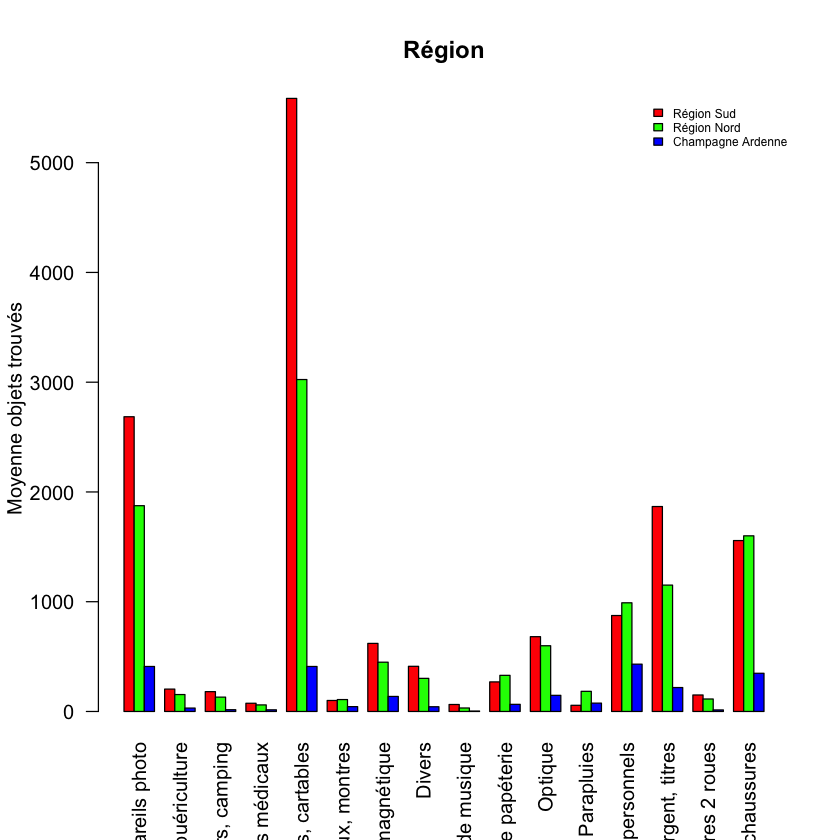

In [142]:
barplot(region.agregee, main="Région", ylab= "Moyenne objets trouvés",
   beside=TRUE, col=rainbow(3), las = 2)
legend("topright", c("Région Sud","Région Nord","Champagne Ardenne"), cex=0.6, 
   bty="n", fill=rainbow(3));

On remarque bien que les trois régions ont des assez fortes disparités au niveau du nombre d'objets trouvés, surtout pour les catégories: 
* appareils photos
* sac à dos 
* parapluies, argent.